# Bayesian Neural Network Regression

In [1]:
import numpy as np
from sklearn import datasets

import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim

import torchbnn as bnn

## Generate Sample Data

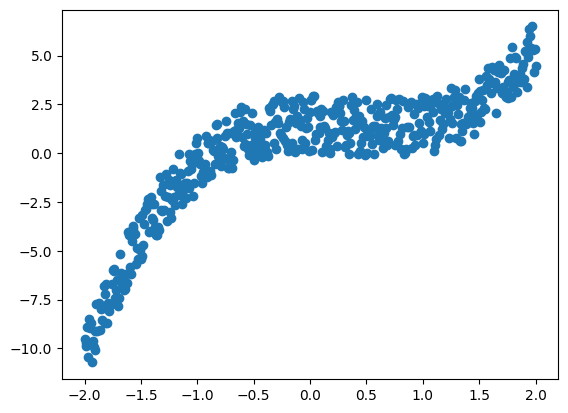

In [2]:
x = torch.linspace(-2, 2, 500)
y = x.pow(3) - x.pow(2) + 3*torch.rand(x.size())
x = torch.unsqueeze(x, dim=1)
y = torch.unsqueeze(y, dim=1)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

## Define Model

In [3]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1, out_features=100),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=100, out_features=1),
)

In [4]:
mse_loss = nn.MSELoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)

## Train Model

In [5]:
kl_weight = 0.1

In [6]:
for step in range(3000):
    pre = model(x)
    mse = mse_loss(pre, y)
    kl = kl_loss(model)
    cost = mse + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    if step % 100 == 0:
        print(f'Epoch {step}: | Loss: {cost}')
    
print('- MSE : %2.2f, KL : %2.2f' % (mse.item(), kl.item()))

Epoch 0: | Loss: tensor([11.3788], grad_fn=<AddBackward0>)
Epoch 100: | Loss: tensor([2.1292], grad_fn=<AddBackward0>)
Epoch 200: | Loss: tensor([1.8489], grad_fn=<AddBackward0>)
Epoch 300: | Loss: tensor([1.5385], grad_fn=<AddBackward0>)
Epoch 400: | Loss: tensor([1.4464], grad_fn=<AddBackward0>)
Epoch 500: | Loss: tensor([1.3680], grad_fn=<AddBackward0>)
Epoch 600: | Loss: tensor([1.4250], grad_fn=<AddBackward0>)
Epoch 700: | Loss: tensor([1.3424], grad_fn=<AddBackward0>)
Epoch 800: | Loss: tensor([1.3895], grad_fn=<AddBackward0>)
Epoch 900: | Loss: tensor([1.4274], grad_fn=<AddBackward0>)
Epoch 1000: | Loss: tensor([1.3600], grad_fn=<AddBackward0>)
Epoch 1100: | Loss: tensor([1.5359], grad_fn=<AddBackward0>)
Epoch 1200: | Loss: tensor([1.4117], grad_fn=<AddBackward0>)
Epoch 1300: | Loss: tensor([1.3397], grad_fn=<AddBackward0>)
Epoch 1400: | Loss: tensor([1.3333], grad_fn=<AddBackward0>)
Epoch 1500: | Loss: tensor([1.3925], grad_fn=<AddBackward0>)
Epoch 1600: | Loss: tensor([1.3321]

## Test Model

In [7]:
x_test = torch.linspace(-2, 2, 500)
y_test = x_test.pow(3) - x_test.pow(2) + 3*torch.rand(x_test.size())

x_test = torch.unsqueeze(x_test, dim=1)
y_test = torch.unsqueeze(y_test, dim=1)

## Visulization

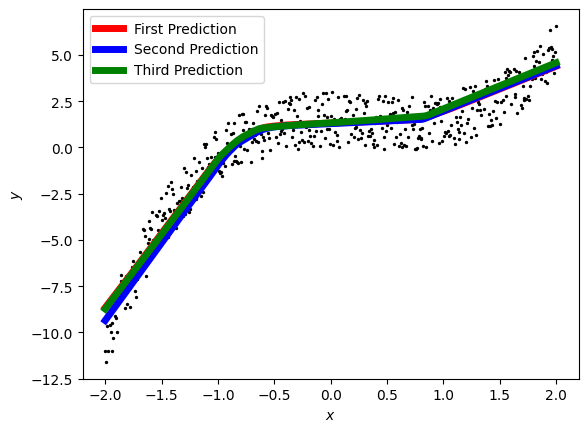

In [8]:
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.scatter(x_test.data.numpy(), y_test.data.numpy(), color='k', s=2) 

y_predict = model(x_test)
plt.plot(x_test.data.numpy(), y_predict.data.numpy(), 'r-', linewidth=5, label='First Prediction')

y_predict = model(x_test)
plt.plot(x_test.data.numpy(), y_predict.data.numpy(), 'b-', linewidth=5, label='Second Prediction')

y_predict = model(x_test)
plt.plot(x_test.data.numpy(), y_predict.data.numpy(), 'g-', linewidth=5, label='Third Prediction')

plt.legend()

plt.show()